In [1]:
import sys
import os
import json
from shapely.geometry import shape
import numpy as np
from dask.distributed import Client, LocalCluster
from pystac_client import Client as StacClient
import stackstac
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
cluster = LocalCluster(
    n_workers=3,             # safe for 15 GB RAM
    threads_per_worker=1,    # raster operations run best single-threaded
    memory_limit="4GB"       # 3 workers × 4GB = 12GB used
)

client = Client(cluster)
cluster


LocalCluster(9f50c041, 'tcp://127.0.0.1:39275', workers=3, threads=3, memory=11.18 GiB)

In [3]:
# Add the folder containing WQI_utils.py
sys.path.append(os.path.abspath("../utils"))

## 2 Import the main functions
from WQI_utils import wqi_indices

In [4]:
study_area = """
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [[
          [-82.8, 27.5],
          [-82.2, 27.5],
          [-82.2, 28.2],
          [-82.8, 28.2],
          [-82.8, 27.5]
        ]]
      }
    }
  ]
}
"""


In [5]:
START_DATE = "2019-01-01"
END_DATE = "2024-12-31"

study_area = json.loads(study_area)
geom = shape(study_area["features"][0]["geometry"])
lon_min, lat_min, lon_max, lat_max = geom.bounds

bbox = (lon_min, lat_min, lon_max, lat_max)
print(bbox)


(-82.8, 27.5, -82.2, 28.2)


Number of Sentinel-2 scenes processed: 500


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(
/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 10.37 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
2025-12-04 13:36:21,683 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 3.03 GiB -- Worker memory limit: 3.73 GiB
2025-12-04 13:36

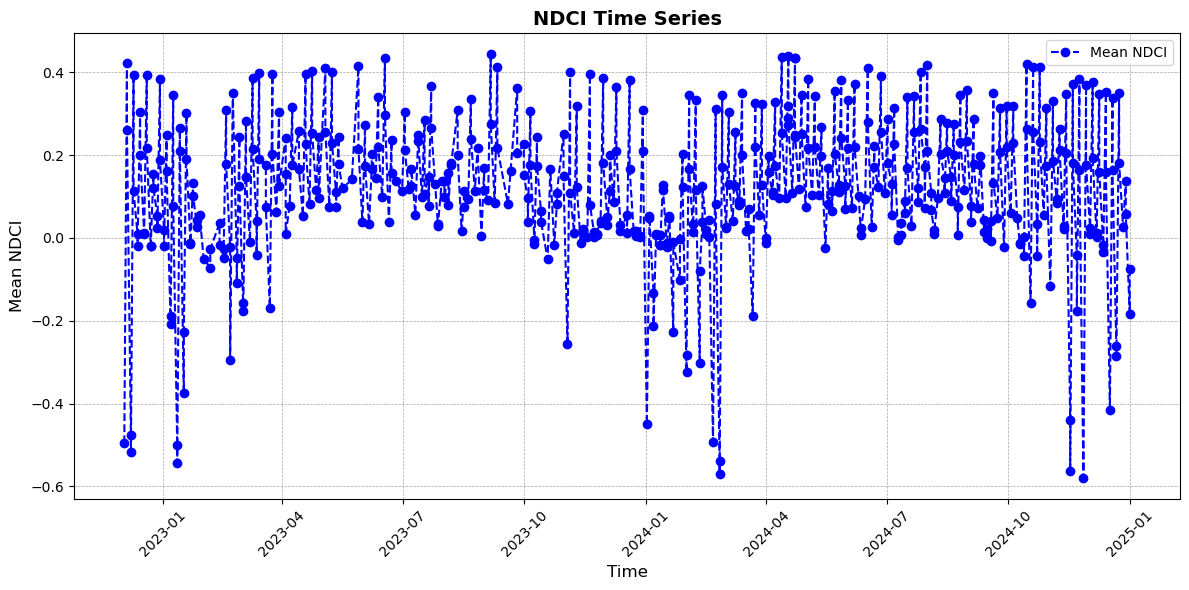

In [6]:
## Plot NDWI Time Series (With no Cloud Filter)
wqi_indices(
    bbox=bbox,
    start_date=START_DATE,
    end_date=END_DATE,
    filter_clouds=False,
)